In [12]:
#code to load all of the csvs in filepath to one pandas df
import pandas as pd
import os
import sys
import tqdm
import matplotlib.pyplot as plt
import torch
root = sys.path[0]
'''
filepath = os.path.join(root, "data/combined")
files = [os.path.join(filepath, file) for file in os.listdir(filepath)]
df = pd.DataFrame()
for file in tqdm.tqdm(files):
    if file.endswith(".csv"):
        data = pd.read_csv(file)
        data['DMS_score'] = data['DMS_score'].astype(float)
        data['DMS_score'] = (data['DMS_score'] - data['DMS_score'].mean()) / data['DMS_score'].std()
        df = pd.concat([df, data], ignore_index=True)
        
df.head()
'''


'\nfilepath = os.path.join(root, "data/combined")\nfiles = [os.path.join(filepath, file) for file in os.listdir(filepath)]\ndf = pd.DataFrame()\nfor file in tqdm.tqdm(files):\n    if file.endswith(".csv"):\n        data = pd.read_csv(file)\n        data[\'DMS_score\'] = data[\'DMS_score\'].astype(float)\n        data[\'DMS_score\'] = (data[\'DMS_score\'] - data[\'DMS_score\'].mean()) / data[\'DMS_score\'].std()\n        df = pd.concat([df, data], ignore_index=True)\n        \ndf.head()\n'

In [13]:
def load_model_and_dataset(name: str):
    model=torch

In [14]:
df.describe()

NameError: name 'df' is not defined

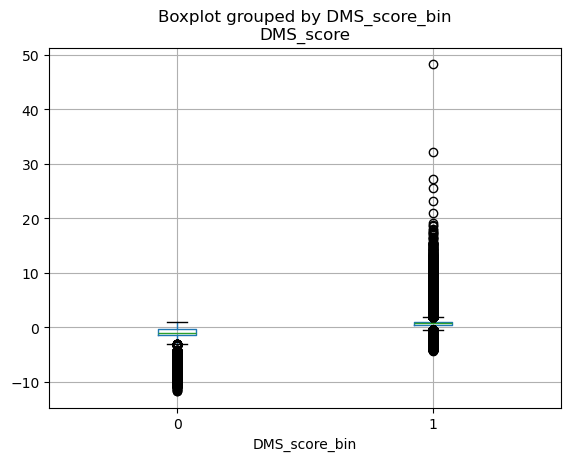

In [4]:
#box and whisker plot of DMS_score
df.boxplot(column = 'DMS_score', by = 'DMS_score_bin')
plt.show()

In [26]:
df['DMS_score'].value_counts()

DMS_score
-1.365478    121728
-1.302535     95525
-1.364211     30433
-1.299425     23897
-0.216353     23551
              ...  
 1.147849         1
 0.278349         1
 0.389644         1
 0.507141         1
 0.496272         1
Name: count, Length: 1060080, dtype: int64

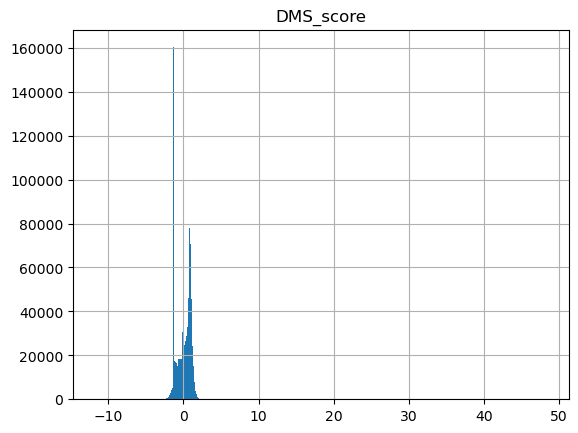

In [25]:
#histogram of Dms_score

df.hist(column='DMS_score', bins=1000)
plt.show()


In [6]:
filepath = "/Clinical_ProteinGym_substitutions"
os.chdir(filepath)
files = os.listdir(filepath)
df = pd.DataFrame()
for file in files:
    if file.endswith(".csv"):
        data = pd.read_csv(file)
        df = pd.concat([df, data], ignore_index=True)
        
df.head()


FileNotFoundError: [Errno 2] No such file or directory: '/Clinical_ProteinGym_substitutions'

In [7]:
df.value_counts('DMS_bin_score')

KeyError: 'DMS_bin_score'

In [6]:
import torch

In [7]:
chen_dataset = torch.load(f'{root}/data/datasets/Chen_train.pt')

In [8]:
chen_dataset.tensors

(tensor([[-0.1569, -0.2963,  0.3784,  ...,  0.6169,  0.0592, -0.1477],
         [-0.1646, -0.2887,  0.4140,  ...,  0.6036,  0.0710, -0.1320],
         [-0.1469, -0.2836,  0.3796,  ...,  0.5760,  0.0463, -0.1025],
         ...,
         [-0.1437, -0.2978,  0.4012,  ...,  0.5922,  0.0646, -0.1144],
         [-0.1730, -0.3039,  0.3847,  ...,  0.6103,  0.0581, -0.1427],
         [-0.1354, -0.2911,  0.3731,  ...,  0.5813,  0.0492, -0.1030]],
        device='cuda:0'),
 tensor([[1.0001],
         [0.4801],
         [0.4593],
         ...,
         [1.2028],
         [0.1441],
         [0.5663]]))

In [9]:
chen_emb = torch.load(f'{root}/data/embeddings/Chen_train_seq.pt')

In [10]:
chen_emb

tensor([[-0.1569, -0.2963,  0.3784,  ...,  0.6169,  0.0592, -0.1477],
        [-0.1646, -0.2887,  0.4140,  ...,  0.6036,  0.0710, -0.1320],
        [-0.1469, -0.2836,  0.3796,  ...,  0.5760,  0.0463, -0.1025],
        ...,
        [-0.1437, -0.2978,  0.4012,  ...,  0.5922,  0.0646, -0.1144],
        [-0.1730, -0.3039,  0.3847,  ...,  0.6103,  0.0581, -0.1427],
        [-0.1354, -0.2911,  0.3731,  ...,  0.5813,  0.0492, -0.1030]],
       device='cuda:0')

In [11]:
chen_model = torch.load(f'{root}/rank_n_contrast/save/Chen_models/RnC_Chen_RepEnc_ep_400_lr_0.5_d_0.1_wd_0.0001_mmt_0.5_bsz_256_aug_crop,flip,color,grayscale_temp_2_label_l1_feature_l2_trial_0/curr_last.pth')

In [15]:
def load_df(name: str):
    filename = f"{root}/data/combined/{name}.csv"
    df = pd.read_csv(filename)
    df['DMS_score'] = df['DMS_score'].astype(float)
    df['DMS_score_normed'] = (df['DMS_score'] - df['DMS_score'].mean()) / df['DMS_score'].std()
    return df

In [16]:
from rank_n_contrast.model import RepresentationEncoder
# Adapted from Rank-N-Contrast code

NAMED_MODEL_PATHS = {
    "chen": f"{root}/rank_n_contrast/save/Chen_models/RnC_Chen_RepEnc_ep_400_lr_0.5_d_0.1_wd_0.0001_mmt_0.5_bsz_256_aug_crop,flip,color,grayscale_temp_2_label_l1_feature_l2_trial_0/curr_last.pth",
    "olson": f"{root}/rank_n_contrast/save/Olson_models/RnC_Olson_RepEnc_ep_200_lr_0.0003_d_0.1_wd_0.0001_mmt_0.5_bsz_256_aug_crop,flip,color,grayscale_temp_2_label_l1_feature_l2_trial_0/curr_last.pth",
    "tsuboyama": f"{root}/rank_n_contrast/save/Tsuboyama_models/RnC_Tsuboyama_RepEnc_ep_400_lr_0.5_d_0.1_wd_0.0001_mmt_0.5_bsz_256_aug_crop,flip,color,grayscale_temp_2_label_l1_feature_l2_trial_0/ckpt_epoch_100.pth"
}

def set_model(name: str = "chen"):
    model = RepresentationEncoder()

    if torch.cuda.is_available():
        if torch.cuda.device_count() > 1:
            model.encoder = torch.nn.DataParallel(model.encoder)
        model = model.cuda()
        torch.backends.cudnn.benchmark = True
    model_state_dict= torch.load(NAMED_MODEL_PATHS[name])
    model.load_state_dict(model_state_dict['model'])

    return model

In [17]:
def load_dataset_embedding_and_model(name: str):
    df = load_df(name)
    model = set_model(name.split("_")[0].lower())
    dataset = torch.load(f'{root}/data/datasets/{name}.pt')
    embedding = torch.load(f'{root}/data/embeddings/{name}_seq.pt')
    return df, dataset, embedding, model

In [18]:
from sklearn.manifold import TSNE

def calculate_tsne(emb, seed=0, verbose=True):
    emb = emb.cpu().detach().numpy()
    tsne = TSNE(n_components=2, random_state=seed, verbose=verbose)
    results = tsne.fit_transform(emb)
    return results

In [19]:
def process_data(name: str):
    file_name = name.title()
    df, dataset, embedding, model = load_dataset_embedding_and_model(f"{file_name}_train")
    df['is_train'] = True
    df_test, dataset, embedding_test, _ = load_dataset_embedding_and_model(f"{file_name}_test")
    df_test['is_train'] = False

    df = pd.concat([df, df_test], ignore_index=True)
    joint_embedding = torch.concat([embedding, embedding_test])
    
    df['x0'], df['y0'] = calculate_tsne(joint_embedding).T
    
    out_embedding = model(joint_embedding)
    df['x'], df['y'] = calculate_tsne(out_embedding).T

    out_path = f"{root}/data/processed_df/{name}.csv"

    df[["DMS_score", "DMS_score_normed", "DMS_score_bin", "x0", "y0", "x", "y"]].to_csv(out_path)

In [20]:
process_data("olson")

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 536962 samples in 0.049s...
[t-SNE] Computed neighbors for 536962 samples in 369.578s...
[t-SNE] Computed conditional probabilities for sample 1000 / 536962
[t-SNE] Computed conditional probabilities for sample 2000 / 536962
[t-SNE] Computed conditional probabilities for sample 3000 / 536962
[t-SNE] Computed conditional probabilities for sample 4000 / 536962
[t-SNE] Computed conditional probabilities for sample 5000 / 536962
[t-SNE] Computed conditional probabilities for sample 6000 / 536962
[t-SNE] Computed conditional probabilities for sample 7000 / 536962
[t-SNE] Computed conditional probabilities for sample 8000 / 536962
[t-SNE] Computed conditional probabilities for sample 9000 / 536962
[t-SNE] Computed conditional probabilities for sample 10000 / 536962
[t-SNE] Computed conditional probabilities for sample 11000 / 536962
[t-SNE] Computed conditional probabilities for sample 12000 / 536962
[t-SNE] Computed conditional proba

In [21]:
process_data("tsuboyama")

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 125432 samples in 0.011s...
[t-SNE] Computed neighbors for 125432 samples in 19.642s...
[t-SNE] Computed conditional probabilities for sample 1000 / 125432
[t-SNE] Computed conditional probabilities for sample 2000 / 125432
[t-SNE] Computed conditional probabilities for sample 3000 / 125432
[t-SNE] Computed conditional probabilities for sample 4000 / 125432
[t-SNE] Computed conditional probabilities for sample 5000 / 125432
[t-SNE] Computed conditional probabilities for sample 6000 / 125432
[t-SNE] Computed conditional probabilities for sample 7000 / 125432
[t-SNE] Computed conditional probabilities for sample 8000 / 125432
[t-SNE] Computed conditional probabilities for sample 9000 / 125432
[t-SNE] Computed conditional probabilities for sample 10000 / 125432
[t-SNE] Computed conditional probabilities for sample 11000 / 125432
[t-SNE] Computed conditional probabilities for sample 12000 / 125432
[t-SNE] Computed conditional probab

In [30]:
def plot_histogram(name, df, bins=1000):
    df.hist(column='DMS_score_normed', bins=bins)
    plt.title(f"Distribution of DMS scores for {name.title()} dataset.")
    plt.savefig(f"{root}/plots/{name}_hist.png")
def plot_boxplot(name, df):
    df.boxplot(column = 'DMS_score_normed', by = 'DMS_score_bin')
    plt.title(f"Boxplot of DMS scores for {name.title()} dataset.")
    plt.savefig(f"{root}/plots/{name}_box.png")
def plot_tsne_model(name, df):
    plt.scatter(df['x'], df['y'], c=df['DMS_score_normed'])
    plt.title(f"TSNE plot of DMS scores from model for {name.title()} dataset.")
    plt.savefig(f"{root}/plots/{name}_tsne_model.png")
def plot_tsne_old(name, df):
    plt.scatter(df['x0'], df['y0'], c=df['DMS_score_normed'])
    plt.title(f"TSNE plot of DMS scores from general embedding for {name.title()} dataset.")
    plt.savefig(f"{root}/plots/{name}_tsne_old.png")

In [31]:
def generate_plots(name: str, bins=1000):
    df = pd.read_csv(f"{root}/data/processed_df/{name}.csv")
    plot_histogram(name, df, bins)
    plot_boxplot(name, df)
    plot_tsne_model(name, df)
    plot_tsne_old(name, df)

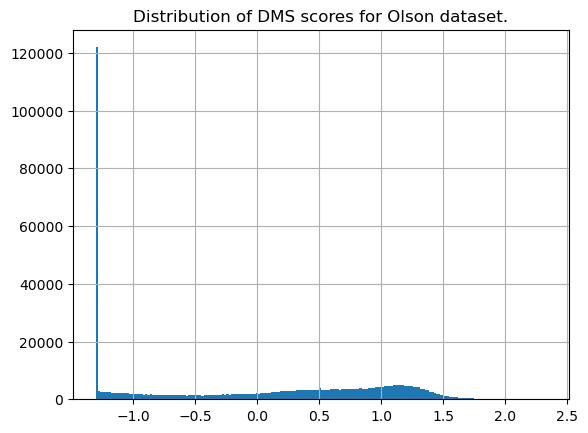

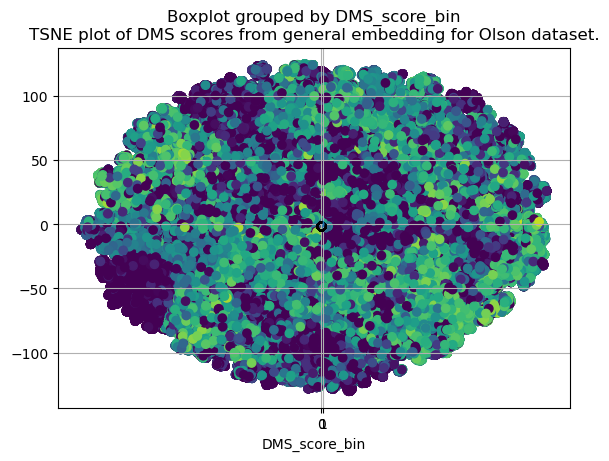

In [34]:
generate_plots("olson", bins=200)

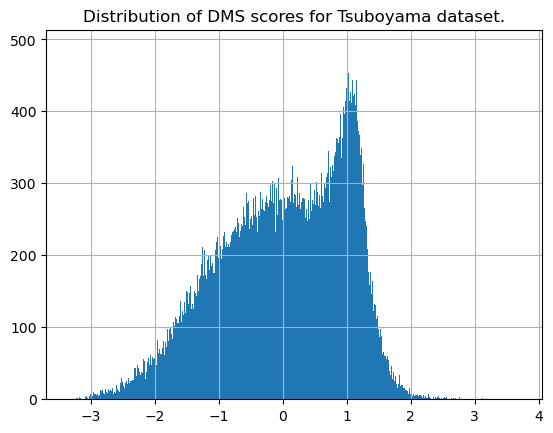

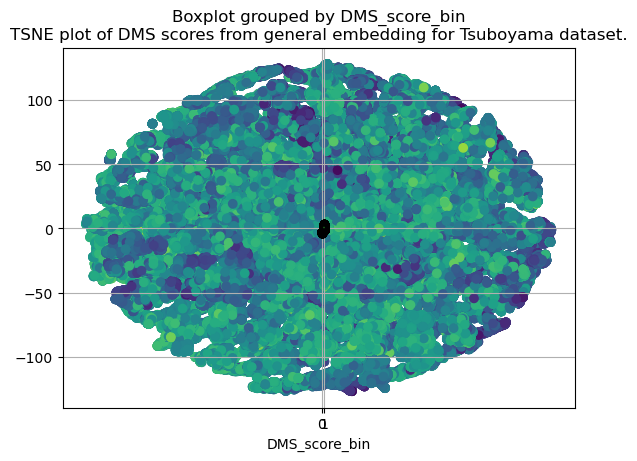

In [35]:
generate_plots("tsuboyama")

In [36]:
process_data("chen")

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 172533 samples in 0.015s...
[t-SNE] Computed neighbors for 172533 samples in 40.446s...
[t-SNE] Computed conditional probabilities for sample 1000 / 172533
[t-SNE] Computed conditional probabilities for sample 2000 / 172533
[t-SNE] Computed conditional probabilities for sample 3000 / 172533
[t-SNE] Computed conditional probabilities for sample 4000 / 172533
[t-SNE] Computed conditional probabilities for sample 5000 / 172533
[t-SNE] Computed conditional probabilities for sample 6000 / 172533
[t-SNE] Computed conditional probabilities for sample 7000 / 172533
[t-SNE] Computed conditional probabilities for sample 8000 / 172533
[t-SNE] Computed conditional probabilities for sample 9000 / 172533
[t-SNE] Computed conditional probabilities for sample 10000 / 172533
[t-SNE] Computed conditional probabilities for sample 11000 / 172533
[t-SNE] Computed conditional probabilities for sample 12000 / 172533
[t-SNE] Computed conditional probab

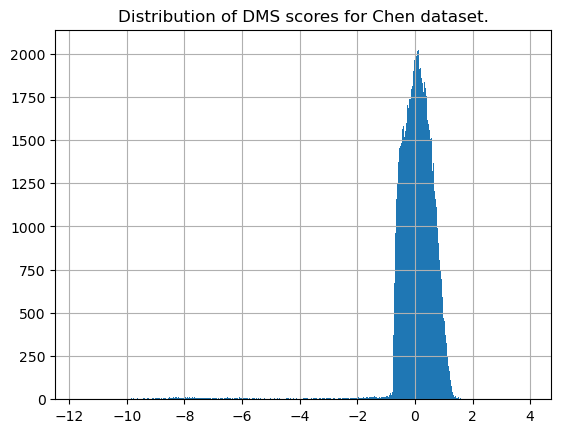

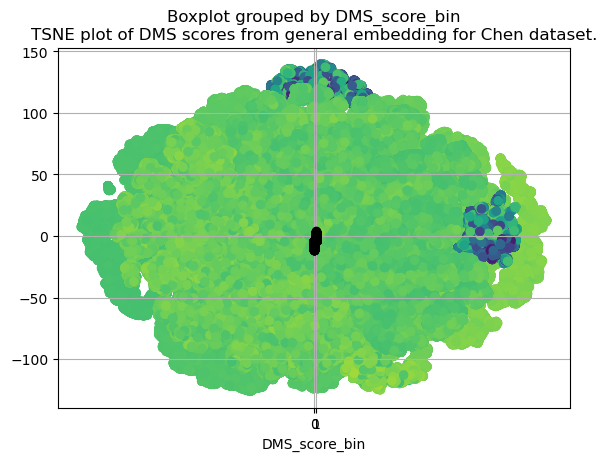

In [37]:
generate_plots("chen")